# Setting the Stage: What Are We Trying to Do?

In [48]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as pt

Let's load an image file and apply a simple image processing operation: *Blurring*. In mathematical terms, we will replace each pixel with a (weighted) average of its neighbors and itself.

/usr/lib/python3/dist-packages/PIL/Image.py:665: ResourceWarning: unclosed file <_io.BufferedReader name='cat.jpeg'>
  self.load()


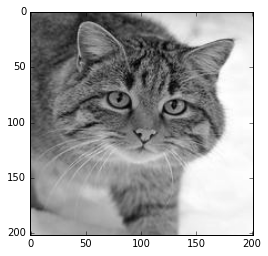

In [49]:
u = scipy.misc.imread("cat.jpeg").astype(np.float32).sum(axis=2)/(3*256)

pt.imshow(u, cmap="gray")

Now make `blurred_u`:

In [61]:
#clear
blurred_u = np.zeros_like(u)
blurred_u[1:-1, 1:-1] = (
    2*u[1:-1, 1:-1]
    + u[2:, 1:-1]
    + u[:-2, 1:-1]
    + u[1:-1, 2:]
    + u[1:-1, 2:]
    )/6
u = blurred_u

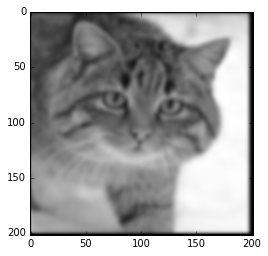

In [62]:
pt.imshow(blurred_u, cmap="gray")

* Now, one individual blurring process may be *fast*. (in the sense that it feels instantaneous)
* But it already takes a number of rounds (and therefore a short while) if we want the picture to be visibly blurry.
* It would take even longer if the picture were bigger than just 200x200 (0.04 Megapixels). For reference, my phone takes pictures with 13 Megapixels.
* It would take even longer if (say) we were a web service that needed to blur millions of images for customers.

As it turns out:
   
* What we did there was *not efficient* in lots of ways.
* Time to peel back the layers, see what's going on under the hood, and understand how to make this process very fast.
* While we're at it: Writing something fast that can *just* blur images might be nice. But it would be far easier to justify the effort to do that if what we wrote was *fast* and *general*, i.e. if it could apply lots of different image processing operations.

**So here we go:** Let's see what would go into designing our own *image processing language*.